<a href="https://colab.research.google.com/github/huyunwei/robust/blob/main/robust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Robust Design
## Tolerance Analysis
### Monte Carlo Simulation   

Monte Carlo simulation is a useful method for performing tolerance stack-up analysis. This method relies on statistical sampling to obtain a numerical result.  

Here's a simple example of using Monte Carlo simulation to perform tolerance stack-up analysis. Suppose we have a system with three components, each with its own nominal dimension and tolerance.  

We'll create a Python script to perform 10,000 simulations and understand the distribution of the total stack-up.  

This script defines the nominal dimensions and tolerances of the components and then simulates the total stack-up using random numbers from a normal distribution with means equal to the nominal dimensions and standard deviations equal to the tolerances.

The resulting histogram shows the distribution of the total stack-up over the simulations, which helps in understanding the variability in the system due to the tolerances of the individual components.

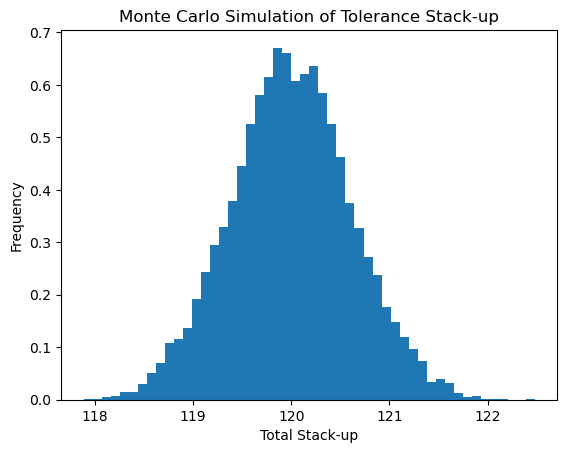

In [2]:
import random
import matplotlib.pyplot as plt

def monte_carlo_simulation(num_simulations):
    # Nominal dimensions and tolerances for three components
    nominal_dimensions = [50, 50, 20]
    tolerances = [0.5, 0.3, 0.2]

    # List to store the total stack-up for each simulation
    total_stack_ups = []

    # Perform simulations
    for _ in range(num_simulations):
        total_stack_up = 0
        for nominal, tolerance in zip(nominal_dimensions, tolerances):
            total_stack_up += random.gauss(nominal, tolerance)
        total_stack_ups.append(total_stack_up)

    return total_stack_ups

# Number of simulations
num_simulations = 10000

# Perform Monte Carlo simulation
total_stack_ups = monte_carlo_simulation(num_simulations)

# Plot histogram
plt.hist(total_stack_ups, bins=50, density=True)
plt.xlabel('Total Stack-up')
plt.ylabel('Frequency')
plt.title('Monte Carlo Simulation of Tolerance Stack-up')
plt.show()


In [3]:
import numpy as np
import pandas as pd
from io import StringIO
df_csv = """X,mu,sigma
B1, 50, 0.5
B2, 20, 01
B3, 30, 0.2
E, 100.1, 0.3
"""
df_X = pd.read_csv(StringIO(df_csv))
df_X

,X,mu,sigma
0,B1,50.0,0.5
1,B2,20.0,1.0
2,B3,30.0,0.2
3,E,100.1,0.3


In [4]:
N_SIM = int(1e6)
df=pd.DataFrame()
for i in range(df_X.shape[0]):
  df[df_X['X'][i]] = np.random.normal(df_X.mu[i], df_X.sigma[i], N_SIM)

df

,B1,B2,B3,E
0,49.682194,20.080506,29.988820,100.122377
1,49.361609,19.662492,30.402340,100.437593
2,49.909190,18.336797,30.043326,100.141565
3,49.713744,21.197834,29.875461,100.014530
4,50.042469,21.025908,30.086222,99.367449
...,...,...,...,...
999995,49.881945,20.838186,30.066566,100.309996
999996,50.182431,20.687323,30.056847,100.166842
999997,49.539705,19.886916,30.122089,100.332951
999998,49.684840,18.446911,30.016666,99.924055


In [5]:
transf = 'Gap = E - B1 - B2 - B3'
df = df.eval(transf)
df.describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]  )

,B1,B2,B3,E,Gap
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,50.000529,20.002766,29.999912,100.099926,0.096718
std,0.499832,1.000627,0.199731,0.300073,1.175749
min,47.561451,15.532944,29.037477,98.645485,-5.741757
1%,48.839585,17.674704,29.536332,99.400745,-2.639941
5%,49.177735,18.356529,29.671460,99.606017,-1.838023
25%,49.663011,19.326471,29.865135,99.897742,-0.695626
50%,50.000474,20.003475,29.999805,100.100119,0.097069
75%,50.337725,20.677318,30.134817,100.302226,0.889853
95%,50.822498,21.648804,30.328207,100.592782,2.029715


In [ ]:
np.sqrt(np.sum(np.square(df_X.sigma)))

In [ ]:
# Plot histogram
plt.hist(df.Gap, bins=100, density=True)
plt.xlabel('Total Stack-up')
plt.ylabel('Frequency')
plt.title('Monte Carlo Simulation of Tolerance Stack-up')
plt.show()

Fitting a Weibull distribution to right-censored time-to-failure data involves statistical methods to estimate the shape and scale parameters of the distribution. Libraries like scipy provide optimization methods for parameter estimation.

Below is a Python code snippet using scipy.optimize to fit a Weibull distribution to right-censored data. For this example, let's assume we have a data set containing time-to-failure data and some censored data points:

In [6]:
from Tol_MC import * 
df_X = get_dfX("resistors.csv")
df_X

,name,nominal,upper_tol,lower_tol,sigma_level,max,min,mean,std
0,R1,1,0.02,-0.02,4,1.02,0.98,1.0,0.005
1,R2,1,0.02,-0.02,4,1.02,0.98,1.0,0.005


In [7]:
transf = "G = R1 / (R1 + R2)"
N_SIM = int(1e6)
df = mc_tol(df_X, transf, N_SIM)
df.describe()

,R1,R2,G
count,1000000.000000,1000000.000000,1000000.000000
mean,1.000001,0.999994,0.500002
std,0.005003,0.005008,0.001769
min,0.974658,0.976601,0.491139
25%,0.996626,0.996619,0.498807
50%,0.999998,1.000004,0.500000
75%,1.003377,1.003368,0.501195
max,1.022470,1.025071,0.508013


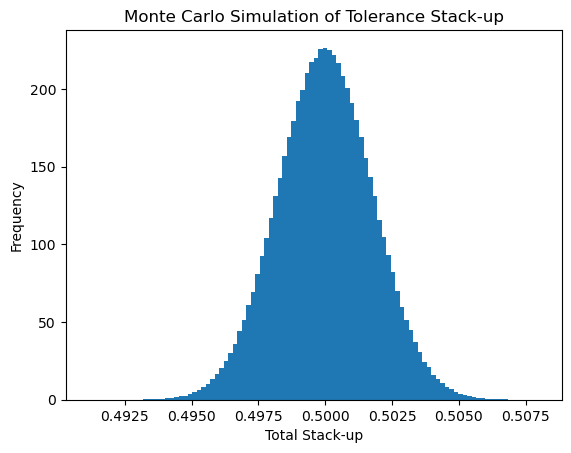

In [8]:
# Plot histogram
plt.hist(df.G, bins=100, density=True)
plt.xlabel('Total Stack-up')
plt.ylabel('Frequency')
plt.title('Monte Carlo Simulation of Tolerance Stack-up')
plt.show()

In [9]:
0.005*np.sqrt(2)/4/df.G.std()

0.9992368981938187

The stress-strength model is a fundamental concept in reliability engineering and design that assesses the reliability or probability of failure of a system, component, or structure by comparing the applied stress to the strength of the material or component. The basic idea is that for a component to function reliably, its strength (the capacity to withstand loads or forces) must exceed the stress (the load or force applied) it experiences during operation.

### Stress (\(S\)):
- Stress represents the demands, loads, pressures, or forces applied to a component. It can vary due to operational conditions, environmental factors, or the way the component is used.

### Strength (\(R\)):
- Strength is the ability of the component to withstand stress without failure. It reflects the material properties, design, manufacturing quality, and sometimes the degradation over time.

### Probability of Failure (\(P_f\)):
The probability of failure occurs when the applied stress exceeds the component's strength (\(P(S > R)\)). In other words, it is the probability that the strength of a component is less than or equal to the applied stress. 

If both stress and strength are considered as random variables with known probability distributions, the probability of failure can be calculated by integrating the joint probability density function (PDF) of stress and strength over the region where stress exceeds strength. However, when stress (\(S\)) and strength (\(R\)) are independent and normally distributed, the probability of failure can be simplified and calculated using:

$$P_f = P(S > R) = \Phi\left(\frac{\mu_S - \mu_R}{\sqrt{\sigma_S^2 + \sigma_R^2}}\right)$$

where:
- $\mu_S$ and $\mu_R$ are the mean values of stress and strength, respectively,
- $\sigma_S^2$ and $\sigma_R^2$ are the variances of stress and strength, respectively,
- $\Phi$ is the cumulative distribution function (CDF) of the standard normal distribution.

### Application:
The stress-strength model is widely used in the design phase to ensure the reliability of components and systems. By understanding and quantifying the stress and strength distributions, designers and engineers can make informed decisions to reduce the probability of failure, such as by selecting appropriate materials, design adjustments, or safety factors.

### Importance:
This model emphasizes the importance of variability and uncertainty in both applied stresses and material strengths. It provides a quantitative method to assess the impact of this variability on system reliability, helping in the identification of potential failure points and the development of more robust designs.


In [6]:
import numpy as np
from scipy.stats import norm

def probability_of_failure(mean_stress, std_stress, mean_strength, std_strength, method='equation'):
    """
    Calculates the probability of failure given the means and standard deviations
    of stress and strength distributions.

    Args:
    - mean_stress (float): Mean of the stress distribution.
    - std_stress (float): Standard deviation of the stress distribution.
    - mean_strength (float): Mean of the strength distribution.
    - std_strength (float): Standard deviation of the strength distribution.
    - method (str): Calculation method ('equation' or 'monte_carlo').

    Returns:
    - float: Probability of failure.
    """
    
    if method == 'equation':
        # Calculate the Z score
        Z = (mean_strength - mean_stress) / np.sqrt(std_stress**2 + std_strength**2)
        # Calculate the probability of failure using the standard normal CDF
        probability_failure = norm.cdf(-Z)
        return probability_failure
    
    elif method == 'monte_carlo':
        # Number of simulations
        n_simulations = 1000000
        # Generate random samples from normal distributions for stress and strength
        stress_samples = np.random.normal(mean_stress, std_stress, n_simulations)
        strength_samples = np.random.normal(mean_strength, std_strength, n_simulations)
        # Calculate failure instances
        failures = stress_samples > strength_samples
        # Calculate probability of failure
        probability_failure = np.mean(failures)
        return probability_failure
    
    else:
        raise ValueError("Method not recognized. Use 'equation' or 'monte_carlo'.")



In [8]:
# Example usage
mean_stress = 100
std_stress = 10
mean_strength = 120
std_strength = 10

# Using the analytical equation
prob_failure_equation = probability_of_failure(mean_stress, std_stress, mean_strength, std_strength, method='equation')
print(f"Probability of failure (Equation): {prob_failure_equation:.4f}")

# Using Monte Carlo simulation
prob_failure_monte_carlo = probability_of_failure(mean_stress, std_stress, mean_strength, std_strength, method='monte_carlo')
print(f"Probability of failure (Monte Carlo): {prob_failure_monte_carlo:.4f}")

Probability of failure (Equation): 0.0786
Probability of failure (Monte Carlo): 0.0788


In [5]:
norm.cdf(3)

0.9986501019683699

In [ ]:
import scipy.stats as stats
import numpy as np

def failure_probability(mean_stress, std_stress, mean_strength, std_strength, method='equation', num_samples=100000):
    if method == 'equation':
        # Calculate the probability of failure using the equation
        probability = 1 - stats.norm.cdf((mean_stress - mean_strength) / np.sqrt(std_stress**2 + std_strength**2))
    elif method == 'monte_carlo':
        # Generate random samples from normal distributions for stress and strength
        stress_samples = np.random.normal(mean_stress, std_stress, num_samples)
        strength_samples = np.random.normal(mean_strength, std_strength, num_samples)
        # Calculate the probability of failure using Monte Carlo simulation
        probability = np.mean(stress_samples > strength_samples)
    else:
        raise ValueError("Invalid method. Choose 'equation' or 'monte_carlo'.")

    return probability

# Example usage:
mean_stress = 50  # Mean of stress distribution
std_stress = 10   # Standard deviation of stress distribution
mean_strength = 45  # Mean of strength distribution
std_strength = 8    # Standard deviation of strength distribution

# Calculate probability of failure using the equation method
probability_equation = failure_probability(mean_stress, std_stress, mean_strength, std_strength, method='equation')
print("Probability of failure (equation method):", probability_equation)

# Calculate probability of failure using Monte Carlo simulation
probability_monte_carlo = failure_probability(mean_stress, std_stress, mean_strength, std_strength, method='monte_carlo')
print("Probability of failure (Monte Carlo simulation):", probability_monte_carlo)

In [10]:
from scipy.optimize import minimize
import numpy as np

def weibull_pdf(x, shape, scale):
    return (shape / scale) * ((x / scale) ** (shape - 1)) * np.exp(-((x / scale) ** shape))

def weibull_log_likelihood(params, data, censored_data):
    shape, scale = params
    # Calculate the log-likelihood for non-censored (failed) data
    log_likelihood = np.sum(np.log(weibull_pdf(data, shape, scale)))
    # For right-censored data, the log-likelihood is calculated using the survival function: 1 - CDF
    log_likelihood += np.sum(-(shape / scale) * ((censored_data / scale) ** shape))
    # We return the negative log-likelihood because scipy's "minimize" seeks to find the minimum value of the given function
    return -log_likelihood

# Example time-to-failure data
data = np.array([10, 35, 50, 70])
# Example right-censored data
censored_data = np.array([80, 90])

# Initial guesses for shape and scale parameters
initial_guess = [1.3, 50]

# Optimization to fit Weibull distribution
result = minimize(weibull_log_likelihood, initial_guess, args=(data, censored_data), bounds=[(0.01, 10), (0.01, 100)])

# Resulting shape and scale parameters
shape, scale = result.x

print(f"Shape parameter: {shape}")
print(f"Scale parameter: {scale}")

Shape parameter: 1.8012462759576051
Scale parameter: 48.0148003624413


In [11]:
from lifelines import WeibullFitter
from scipy.special import gamma

# Time to event (either failure or censoring)
durations = [10, 35, 50, 70, 80, 90]

# Event indicator: 1 if the event is observed (failure), 0 if data is censored
event_observed = [1, 1, 1, 1, 0, 0]

# Initialize the fitter
wf = WeibullFitter()

# Fit the data
wf.fit(durations, event_observed=event_observed)

# Print the summary
wf.print_summary()

# You can access the parameters using the following attributes
print("Shape parameter (rho_):", wf.rho_)
print("Scale parameter (lambda_):", wf.lambda_)

# Calculate MTTF
mttf = wf.lambda_ * gamma(1 + 1/wf.rho_)
print(f"Estimated MTTF: {mttf}")

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 6 total observations, 2 right-censored observations>
   number of observations = 6
number of events observed = 4
           log-likelihood = -21.48
               hypothesis = lambda_ != 1, rho_ != 1

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_  78.64      28.87            22.06           135.22
rho_      1.38       0.62             0.17             2.59

          cmp to    z    p   -log2(p)
lambda_     1.00 2.69 0.01       7.13
rho_        1.00 0.62 0.54       0.90
---
AIC = 46.96

Shape parameter (rho_): 1.3813143699309725
Scale parameter (lambda_): 78.64137992312745
Estimated MTTF: 71.83061360648522


Results from Fit_Weibull_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 20/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         28.1696         3.57032   21.9733   36.1131
     Beta         1.86308         0.32449   1.32428   2.62111 

Goodness of fit    Value
 Log-likelihood -79.5482
           AICc  163.802
            BIC  165.088
             AD  0.83728 



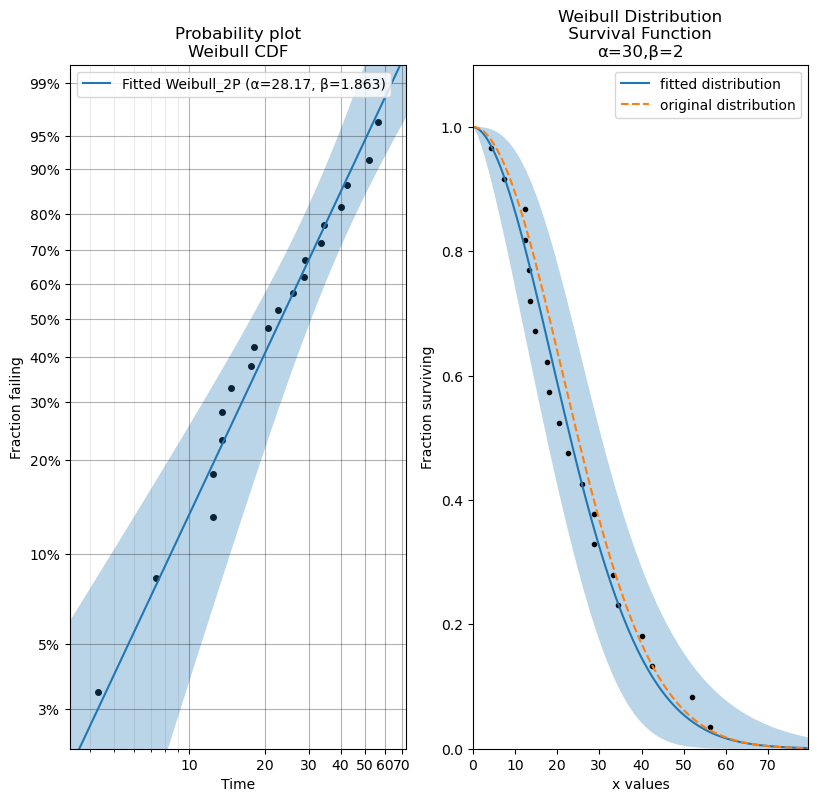

In [12]:
from reliability.Distributions import Weibull_Distribution
from reliability.Fitters import Fit_Weibull_2P
from reliability.Probability_plotting import plot_points
import matplotlib.pyplot as plt

dist = Weibull_Distribution(alpha=30, beta=2)  # creates the distribution object
data = dist.random_samples(20, seed=42)  # draws 20 samples from the distribution. Seeded for repeatability
plt.subplot(121)
fit = Fit_Weibull_2P(failures=data)  # fits a Weibull distribution to the data and generates the probability plot
plt.subplot(122)
fit.distribution.SF(label='fitted distribution')  # uses the distribution object from Fit_Weibull_2P and plots the survival function
dist.SF(label='original distribution', linestyle='--') # plots the survival function of the original distribution
plot_points(failures=data, func='SF')  # overlays the original data on the survival function
plt.legend()
plt.show()

In [13]:
# import altair with an abbreviated alias
import altair as alt
alt.renderers.enable('mimetype')

# load a sample dataset as a pandas DataFrame
from vega_datasets import data
cars = data.cars()

# make the chart
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
).interactive()

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting
